## Workflow Example

Below is a simple workflow that applies all the basic principles needed to create a neural network that makes use of forward and backward propagation.

In [373]:
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'1.12.1+cu116'

### Preprocessing: Create and Load Data

In [374]:
# our linear regression formula with some known parameters
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

### Preprocessing: Partition Data with a Train-Test Split

In [375]:
# create a training-testing split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize Train-Test Split

In [376]:
def plotPredictions(train_data=X_train, 
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """Plot our training data, test data and compare predictions"""
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data,train_labels, c="b", s=4, label="Training Data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14})

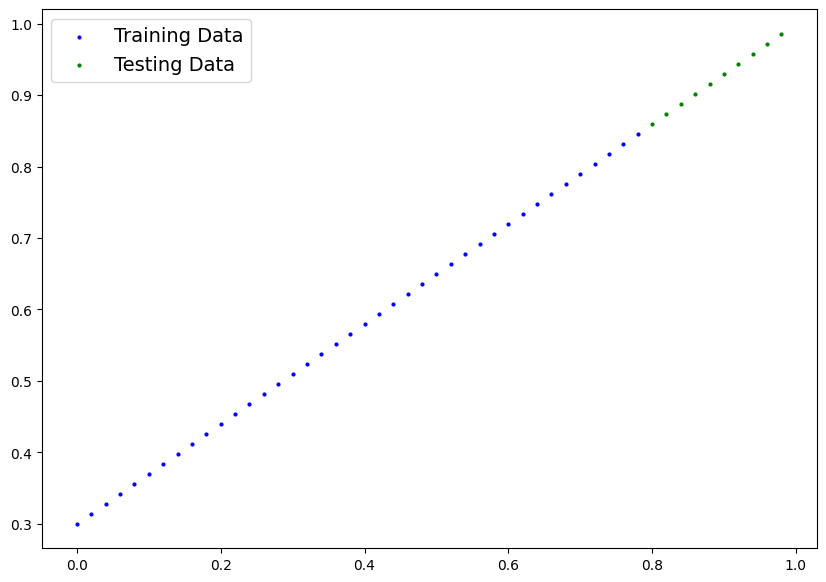

In [377]:
plotPredictions()

### Build Model

* `torch.nn`
* `torch.nn.Parameter` - parameters our model should learn
* `torch.nn.Module` - base class for all neural network modules
* `torch.optim` - where all the parameter optimizer algorithms are located

It's worth remembering that all nn.Module sub-classes require us to overwrite the forward() method in order to dicate what will happen during the forward computation in our model.

In [378]:
# A basic linear regression model in pytorch
class BasicLinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # initialize model parameters
        self.weights = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    # defines the forward computation needed to be done
    # linear regression in this case
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### Train Model

In [379]:
# A random seed
torch.manual_seed("848")

# Create an instance of our model
model_0 = BasicLinearRegressionModel()

# Take a look at the model's parameters
list(model_0.state_dict())
list(model_0.parameters())

[Parameter containing:
 tensor([0.1262], requires_grad=True),
 Parameter containing:
 tensor([0.6109], requires_grad=True)]

### Model Predictions

If we try to make some preliminary predictions, we'll see that the model does poorly, this is the case because it has been freshly instantiated with random values, and hasn't undergone any training.

* `torch.inference_mode()`

Note: disables gradient tracking so we can make a prediction, newer version of `torch.no_grad`.

In [380]:
with torch.inference_mode():
    y_predictions = model_0(X_test)

y_predictions

tensor([[0.7119],
        [0.7144],
        [0.7169],
        [0.7194],
        [0.7220],
        [0.7245],
        [0.7270],
        [0.7295],
        [0.7321],
        [0.7346]])

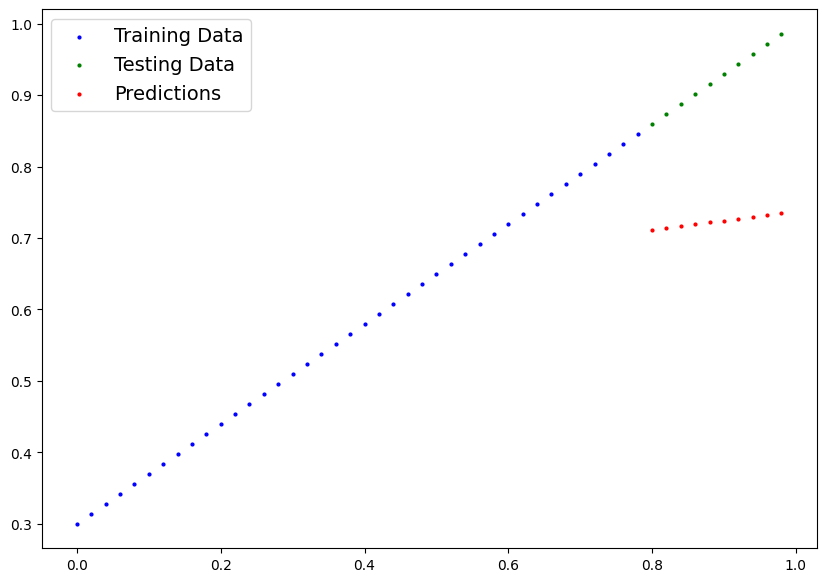

In [381]:
plotPredictions(predictions=y_predictions)

### Loss Functions and Optimizer

In [382]:
# Create Mean Absolute Error Loss Function
MAE_loss = torch.nn.L1Loss()

# Create Optimizer (Stochastic Gradient Descent), Learning Rate Hyperparameter
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.0015)

### Training Loop

    a. forward propagation
    b. calculate loss (forward prop. vs ground truth)
    c. optimizer (set gradients to zero for every mini-batch)
    d. backpropagation (new parameter gradient based on loss)
    e. optimizer (gradient descent)

In [383]:
# Build a training loop

EPOCHS = 2500

epoch_count = []
loss_values = []
test_loss_values = []

# a. loop through data
for epoch in range(EPOCHS):
    # enable training mode and track gradients on valid parameters
    model_0.train()  
    
    # a. forward propagation (our "forward()" method)
    y_predictions = model_0(X_train)
    
    # b. calculate loss
    loss = MAE_loss(y_predictions, y_train)
    
    # c. zero_grad optimizer (zero out the optimizer gradients)
    optimizer.zero_grad()
    
    # d. back propagation on loss function (compute gradient for every parameter)
    loss.backward()
    
    # e. gradient descent optimizer (update parameters with new gradients)
    optimizer.step()
    
    # Testing
    # turn off gradient tracking
    model_0.eval()
    with torch.inference_mode():
        # forward pass
        test_pred = model_0(X_test)
        # loss pass
        test_loss = MAE_loss(test_pred, y_test)
    
    # Let's print out our progress to see where we can make changes (learning rate, epoch count)
    if epoch % 200 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Test: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Test: 0.13126517832279205 | Test Loss: 0.20035092532634735
Epoch: 200 | Test: 0.11089324951171875 | Test Loss: 0.24169103801250458
Epoch: 400 | Test: 0.10009799897670746 | Test Loss: 0.2316441833972931
Epoch: 600 | Test: 0.0897420197725296 | Test Loss: 0.20971441268920898
Epoch: 800 | Test: 0.0794387012720108 | Test Loss: 0.18561792373657227
Epoch: 1000 | Test: 0.069135382771492 | Test Loss: 0.16152140498161316
Epoch: 1200 | Test: 0.058832306414842606 | Test Loss: 0.13747641444206238
Epoch: 1400 | Test: 0.04852917417883873 | Test Loss: 0.11337991058826447
Epoch: 1600 | Test: 0.038225527852773666 | Test Loss: 0.08923237025737762
Epoch: 1800 | Test: 0.027922678738832474 | Test Loss: 0.06513817608356476
Epoch: 2000 | Test: 0.01761982962489128 | Test Loss: 0.04104398563504219
Epoch: 2200 | Test: 0.007317935116589069 | Test Loss: 0.017001289874315262
Epoch: 2400 | Test: 0.0010490961140021682 | Test Loss: 0.0003683447721414268


Our model converges at around 2400 epochs with a learning rate of 0.0015, my intuition tells me that convergence in this scenario is hindered by the small dataset size, and we can tease a higher accuracy out of the small set by using a very small learning rate.

In [384]:
print(f"Loss:{loss}")

Loss:0.0006790719926357269


In [385]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6988])), ('bias', tensor([0.2994]))])


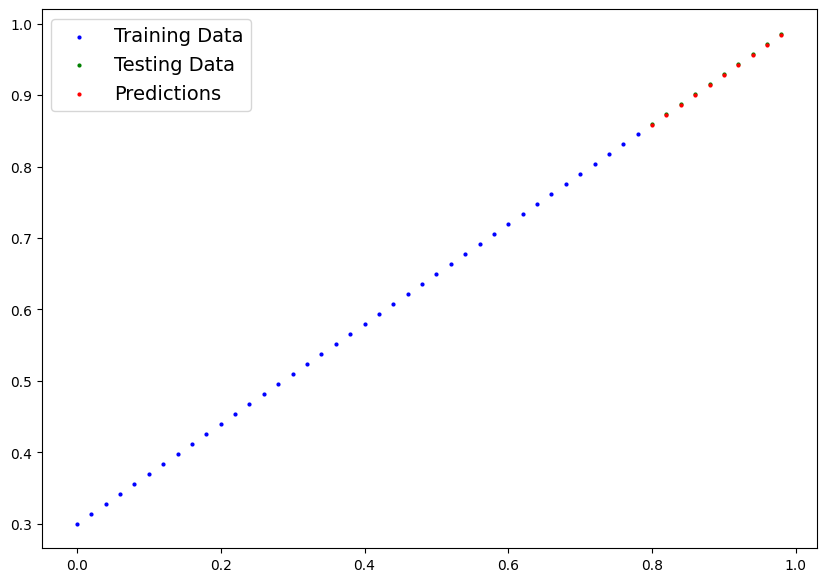

In [386]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)
    
plotPredictions(predictions=y_pred_new)

Let's convert out tensor into a numpy array and see if we can represent this new data in a way that shows our progress.

In [393]:
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([], dtype=float32),
 [tensor(0.2004),
  tensor(0.2417),
  tensor(0.2316),
  tensor(0.2097),
  tensor(0.1856),
  tensor(0.1615),
  tensor(0.1375),
  tensor(0.1134),
  tensor(0.0892),
  tensor(0.0651),
  tensor(0.0410),
  tensor(0.0170),
  tensor(0.0004)])

## Saving and Loading Models

1. `torch.save` - allows us to save the model as a pickle object. (serialized object)
2. `torch.load` - allows us to load saved pickle objects
3. `torch.nn.Module.load_state_dict()` - allows us to load the model's saved state

In [414]:
# Save Model
from pathlib import Path
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)
model_name = "01_pytorch_worflow_model_0.pth"
model_save_path = model_path / model_name

torch.save(obj=model_0.state_dict(), f=model_save_path)

In [415]:
ls -l models/

total 4
-rw-r--r--. 1 marthinus marthinus 1063 Aug 29 12:11 01_pytorch_worflow_model_0.pth


In [406]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6988])), ('bias', tensor([0.2994]))])

Now that we've saved our model, let's try to load it into a new instance of our model class.

In [416]:
# Load Model

# create new model class instance
loaded_model_0 = BasicLinearRegressionModel()

# Check the state of the model
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.9884])), ('bias', tensor([-1.9667]))])

Alright, we have a new model that's freshly instantiated and as you can see it's been populated with the default random values we seeded to it from our class. Let's load the state dictionary we saved into this new model.

In [418]:
# load state_dict of model
loaded_model_0.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

If we now check the state of the new instance...

In [420]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6988])), ('bias', tensor([0.2994]))])

In [422]:
# Set our model into an evaluation mode and make some predictions
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_predictions = loaded_model_0(X_test)
    
loaded_model_predictions

tensor([[0.8585],
        [0.8724],
        [0.8864],
        [0.9004],
        [0.9144],
        [0.9283],
        [0.9423],
        [0.9563],
        [0.9703],
        [0.9842]])

In [423]:
# Compare equivalence between previous predicitons to new predicitons
y_pred_new == loaded_model_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])